# Best Model Analysis


In [1]:
#!pip install mlxtend

In [1]:
import sys
sys.path.append('./../../model_comparison/')

from mlxtend.plotting import plot_learning_curves

import os
import json

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
from algorithms.feature_selection import FisherScoreSelection

/anaconda3/lib/python3.7/site-packages/pyparsing.py:2725: FutureWarning: Possible set intersection at position 3
  self.re = re.compile( self.reString )


In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

def balanced_roc_auc(y_true, y_pred):

    return roc_auc_score(y_true, y_pred, average='weighted')

In [4]:
results = pd.read_csv(
    './../../../data_source/results/dtree_univariate_sbs/50evals_50reps_dtree_univariate_sbs_dfs.csv',
    index_col=0
)
results.head()

,exp_id,experiment_id,memory,steps,VarianceThreshold,StandardScaler,StudentTTestSelection,DTreeEstimator,VarianceThreshold__threshold,StandardScaler__copy,...,Chi2Selection__error_handling,Chi2Selection__num_features,MRMRSelection,MRMRSelection__error_handling,MRMRSelection__num_features,MRMRSelection__num_neighbors,ReliefFSelection,ReliefFSelection__error_handling,ReliefFSelection__num_features,ReliefFSelection__num_neighbors
0,44,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
np.unique(results.experiment_id)

array(['ANOVAFvalueSelection_DTreeEstimator',
       'Chi2Selection_DTreeEstimator', 'FScoreSelection_DTreeEstimator',
       'MRMRSelection_DTreeEstimator',
       'MutualInformationSelection_DTreeEstimator',
       'ReliefFSelection_DTreeEstimator',
       'StudentTTestSelection_DTreeEstimator',
       'WilcoxonSelection_DTreeEstimator'], dtype=object)

In [6]:
results.shape

(400, 59)

In [7]:
results_grp = results.groupby('experiment_id')

In [8]:
target = 'FScoreSelection_DTreeEstimator'
data = None
for name, values in results_grp:
    if name == target:
        dtree_val = values['test_score']
        dtree_train = values['train_score']
        data = values

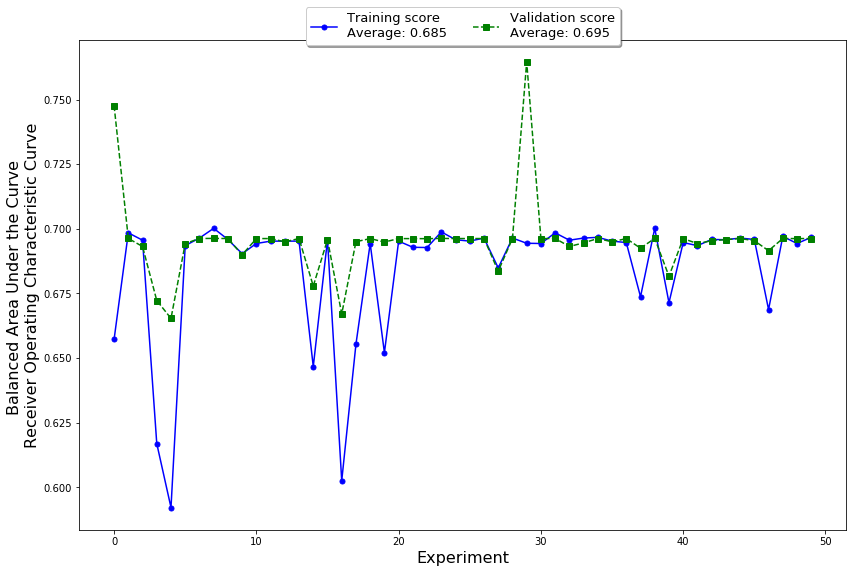

In [20]:
test_results = results['test_score']
train_results = results['train_score']
    
x_coords = np.arange(50)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
axes.plot(
    x_coords, dtree_val, 
    color='blue', marker='o', markersize=5, 
    label=f'Training score\nAverage: {np.round(np.mean(dtree_val), 3)}'
)
axes.plot(
    x_coords, dtree_train, 
    color='green', linestyle='--', marker='s', 
    label=f'Validation score\nAverage: {np.round(np.mean(dtree_train), 3)}'
)
plt.ylabel('Balanced Area Under the Curve \nReceiver Operating Characteristic Curve', fontsize=16)
plt.xlabel('Experiment', fontsize=16)
plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.08),
    ncol=2, 
    fontsize=13,
    fancybox=True, 
    shadow=True
)
plt.tight_layout()
plt.savefig(
    './../../../figures/train_test_dtree_fisher.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

In [10]:
data['DTreeEstimator'].loc[[107, 138]].values[0]

"DTreeEstimator(class_weight='balanced', criterion='entropy', max_depth=10,\n        max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0,\n        min_impurity_split=None, min_samples_leaf=0.3427821936911097,\n        min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False,\n        random_state=None, splitter='best')"

In [11]:
data['DTreeEstimator'].loc[[107, 138]].values[1]

"DTreeEstimator(class_weight='balanced', criterion='entropy', max_depth=5,\n        max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0,\n        min_impurity_split=None, min_samples_leaf=0.35143404559921143,\n        min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False,\n        random_state=None, splitter='best')"

In [12]:
data['FScoreSelection__num_features'].loc[[107, 138]]

107    24.0
138    37.0
Name: FScoreSelection__num_features, dtype: float64

In [13]:
"""Manual inspection of best parameter settings according to best test score:
* Same test score achieved at indecies 107 and 138.
* Parameter varying between experiments is max depth.
* Run validation curve to determine final best parameter.


NB: Most improtant hparam is min samples leaf!!!
"""

'Manual inspection of best parameter settings according to best test score:\n* Same test score achieved at indecies 107 and 138.\n* Parameter varying between experiments is max depth.\n* Run validation curve to determine final best parameter.\n\n\nNB: Most improtant hparam is min samples leaf!!!\n'

In [34]:
pipe1 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('fisher_score', FisherScoreSelection(num_features=24)),
        ('dtree', DecisionTreeClassifier(
            class_weight='balanced', 
            criterion='entropy', 
            max_depth=10,
            max_features=None, 
            max_leaf_nodes=None, 
            min_impurity_decrease=0.0, 
            min_impurity_split=None, 
            min_samples_leaf=0.3427821936911097, 
            min_samples_split=2, 
            min_weight_fraction_leaf=0.0, 
            presort=False,
            random_state=0, splitter='best'
        ))
    ]
)
pipe2 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('fisher_score', FisherScoreSelection(num_features=37)),
        ('dtree', DecisionTreeClassifier(
            class_weight='balanced', 
            criterion='entropy', 
            max_depth=5, 
            max_features=None, 
            max_leaf_nodes=None, 
            min_impurity_decrease=0.0, 
            min_impurity_split=None, 
            min_samples_leaf=0.35143404559921143, 
            min_samples_split=2, 
            min_weight_fraction_leaf=0.0, 
            presort=False, 
            random_state=None, 
            splitter='best'
        ))
    ]
)

In [35]:
X = pd.read_csv('./../../../data_source/to_analysis/anomaly_filtered_concat.csv', index_col=0)
DROPPED = [38, 45, 82]
y = pd.read_csv('./../../../data_source/to_analysis/target_dfs.csv', index_col=0)
y.drop(DROPPED, inplace=True)
y = np.squeeze(y.values)

In [36]:
param_range = np.linspace(2, 100, 50, dtype=int)

train_scores1, test_scores1 = validation_curve(
    pipe1,
    X,
    y,
    #param_name='dtree__max_depth',
    param_name='dtree__min_samples_leaf',
    param_range=param_range,
    cv=10,
    scoring=make_scorer(balanced_roc_auc),
    n_jobs=-1
)
# Calculate mean and standard deviation for training set scores
train_mean1 = np.mean(train_scores1, axis=1)
train_std1 = np.std(train_scores1, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean1 = np.mean(test_scores1, axis=1)
test_std1 = np.std(test_scores1, axis=1)

train_avg1 = np.round(np.mean(train_scores1), 2)
val_avg1 = np.round(np.mean(test_scores1), 2)


train_scores2, test_scores2 = validation_curve(
    pipe2,
    X,
    y,
    #param_name='dtree__max_depth',
    param_name='dtree__min_samples_leaf',
    param_range=param_range,
    cv=10,
    scoring=make_scorer(balanced_roc_auc),
    n_jobs=-1
)
# Calculate mean and standard deviation for training set scores
train_mean2 = np.mean(train_scores2, axis=1)
train_std2 = np.std(train_scores2, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean2 = np.mean(test_scores2, axis=1)
test_std2 = np.std(test_scores2, axis=1)

train_avg2 = np.round(np.mean(train_scores2), 2)
val_avg2 = np.round(np.mean(test_scores2), 2)

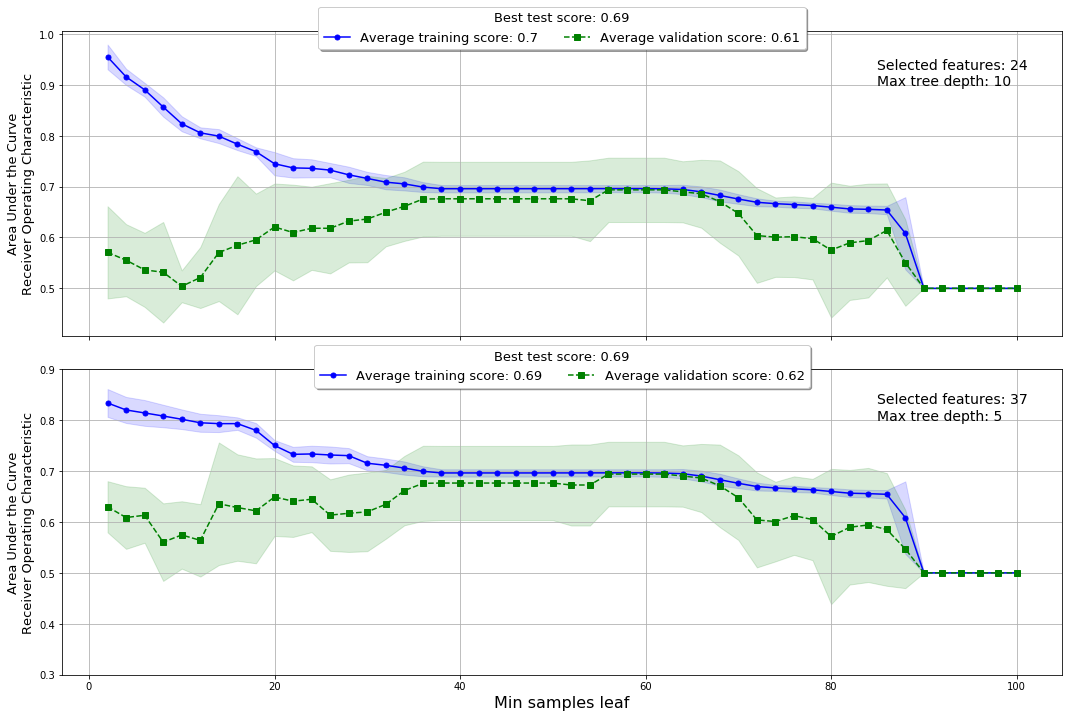

In [37]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(15, 10))

# Plot mean accuracy scores for training and test sets
axes[0].plot(param_range, train_mean1, color='blue', marker='o', markersize=5, label=f"Average training score: {train_avg1}")
axes[0].plot(param_range, test_mean1, color='green', linestyle='--', marker='s', label=f"Average validation score: {val_avg1}")

# Plot accurancy bands for training and test sets
axes[0].fill_between(param_range, train_mean1 - train_std1, train_mean1 + train_std1, alpha=0.15, color='blue')
axes[0].fill_between(param_range, test_mean1 - test_std1, test_mean1 + test_std1, alpha=0.15, color='green')

# Create plot
#axes[0].set_xlabel('Min samples leaf',fontsize=13,)
axes[0].set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=13)
axes[0].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    title=f'Best test score: {np.round(np.max(test_mean1), 2)}',
    ncol=2,
    fontsize=13,
    title_fontsize=13,
    fancybox=True,
    shadow=True
)
axes[0].text(85, 0.9, 'Selected features: 24\nMax tree depth: 10', fontsize=14)
axes[0].grid()


# Plot mean accuracy scores for training and test sets
axes[1].plot(param_range, train_mean2, color='blue', marker='o', markersize=5, label=f"Average training score: {train_avg2}")
axes[1].plot(param_range, test_mean2, color='green', linestyle='--', marker='s', label=f"Average validation score: {val_avg2}")

# Plot accurancy bands for training and test sets
axes[1].fill_between(param_range, train_mean2 - train_std2, train_mean2 + train_std2, alpha=0.15, color='blue')
axes[1].fill_between(param_range, test_mean2 - test_std2, test_mean2 + test_std2, alpha=0.15, color='green')

# Create plot
axes[1].set_xlabel('Min samples leaf', fontsize=16)
axes[1].set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=13)

axes[1].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    title=f'Best test score: {np.round(np.max(test_mean2), 2)}',
    ncol=2,
    fontsize=13,
    title_fontsize=13,
    fancybox=True,
    shadow=True
)
axes[1].text(85, 0.8, 'Selected features: 37\nMax tree depth: 5', fontsize=14)
axes[1].grid()
plt.ylim([0.3, 0.9])
plt.tight_layout()

plt.savefig(
    './../../../figures/fisher_dtree_validation_curve.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100,
)

In [38]:
# NB: Specify hyperparameters in pipelines before running. 

split_sizes = np.linspace(0.1, 1.0, 50)

train_sizes1, train_scores1, test_scores1 = learning_curve(
    estimator=pipe1,
    X=X,
    y=y,
    train_sizes=split_sizes,
    cv=10,
    scoring=make_scorer(balanced_roc_auc),
    n_jobs=-1
)
# Calculate mean and standard deviation for training set scores
train_mean1 = np.mean(train_scores1, axis=1)
train_std1 = np.std(train_scores1, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean1 = np.mean(test_scores1, axis=1)
test_std1 = np.std(test_scores1, axis=1)

train_avg1 = np.round(np.mean(train_scores1), 2)
val_avg1 = np.round(np.mean(test_scores1), 2)



train_sizes2, train_scores2, test_scores2 = learning_curve(
    estimator=pipe2,
    X=X,
    y=y,
    train_sizes=split_sizes,
    cv=10,
    scoring=make_scorer(balanced_roc_auc),
    n_jobs=-1
)
# Calculate mean and standard deviation for training set scores
train_mean2 = np.mean(train_scores2, axis=1)
train_std2 = np.std(train_scores2, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean2 = np.mean(test_scores2, axis=1)
test_std2 = np.std(test_scores2, axis=1)

train_avg2 = np.round(np.mean(train_scores2), 2)
val_avg2 = np.round(np.mean(test_scores2), 2)

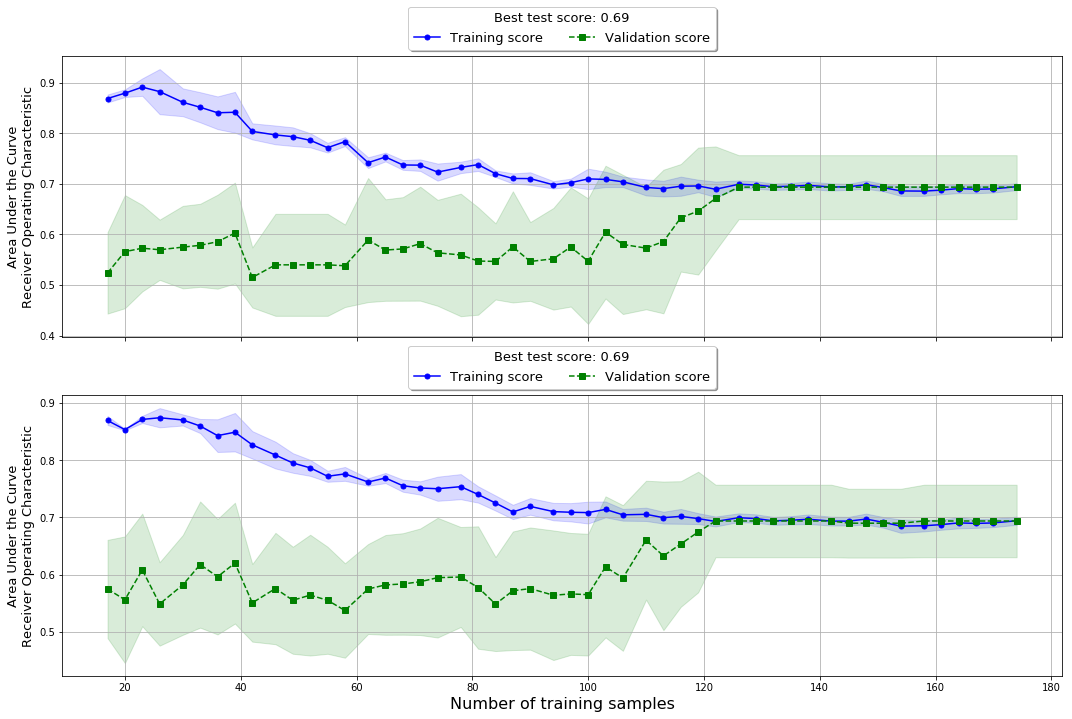

In [39]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(15, 10))

# Plot mean accuracy scores for training and test sets
axes[0].plot(train_sizes1, train_mean1, color='blue', marker='o', markersize=5, label='Training score')#)label=f"Average training score: {train_avg1}")
axes[0].plot(train_sizes1, test_mean1, color='green', linestyle='--', marker='s', label='Validation score')#)label=f"Average validation score: {val_avg1}")

# Plot accurancy bands for training and test sets
axes[0].fill_between(train_sizes1, train_mean1 + train_std1, train_mean1 - train_std1, alpha=0.15, color='blue')#color='gray')
axes[0].fill_between(train_sizes1, test_mean1 + test_std1, test_mean1 - test_std1, alpha=0.15, color='green')#color='gainsboro')

# Create plot
#axes[0].set_xlabel('Number of training samples', fontsize=13,)
axes[0].set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=13)
axes[0].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.2),
    title=f'Best test score: {np.round(np.max(test_mean1), 2)}',
    ncol=2,
    fontsize=13,
    title_fontsize=13,
    fancybox=True,
    shadow=True
)
#axes[0].text(85, 0.9, 'Selected features: 24\nMax tree depth: 10', fontsize=14)
#axes[0].axhline(y=np.max(test_mean1), color='r', linestyle='--', alpha=0.7)
axes[0].grid()



# Plot mean accuracy scores for training and test sets
axes[1].plot(train_sizes2, train_mean2, color='blue', marker='o', markersize=5, label='Training score')#)label=f"Average training score: {train_avg1}")
axes[1].plot(train_sizes2, test_mean2, color='green', linestyle='--', marker='s', label='Validation score')#)label=f"Average validation score: {val_avg1}")

# Plot accurancy bands for training and test sets
axes[1].fill_between(train_sizes1, train_mean2 + train_std2, train_mean2 - train_std2, alpha=0.15, color='blue')#color='gray')
axes[1].fill_between(train_sizes2, test_mean2 + test_std2, test_mean2 - test_std2, alpha=0.15, color='green')#color='gainsboro')

# Create plot
axes[1].set_xlabel('Number of training samples', fontsize=16)
axes[1].set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=13)

axes[1].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.2),
    title=f'Best test score: {np.round(np.max(test_mean2), 2)}',
    ncol=2,
    fontsize=13,
    title_fontsize=13,
    fancybox=True,
    shadow=True
)
#axes[1].text(85, 0.8, 'Selected features: 37\nMax tree depth: 5', fontsize=14)
#axes[1].axhline(y=np.max(test_mean2), color='r', linestyle='--', alpha=0.7)

axes[1].grid()
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()

plt.savefig(
    './../../../figures/fisher_dtree_learning_curve.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100,
)